Global Stiffnes Matrix 
 [[ 2.68274338e+09 -1.02403827e+09 -7.68046426e+04 -2.00000000e+09
   0.00000000e+00  0.00000000e+00 -6.82743382e+08  1.02403827e+09
  -7.68046426e+04]
 [-1.02403827e+09  1.53614611e+09  2.37969050e+04  0.00000000e+00
  -3.75000000e+04  7.50000000e+04  1.02403827e+09 -1.53610861e+09
  -5.12030950e+04]
 [-7.68046426e+04  2.37969050e+04  4.21880078e+05  0.00000000e+00
  -7.50000000e+04  1.00000000e+05  7.68046426e+04  5.12030950e+04
   1.10940039e+05]
 [-2.00000000e+09  0.00000000e+00  0.00000000e+00  2.00000000e+09
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -3.75000000e+04 -7.50000000e+04  0.00000000e+00
   3.75000000e+04 -7.50000000e+04  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  7.50000000e+04  1.00000000e+05  0.00000000e+00
  -7.50000000e+04  2.00000000e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-6.82743382e+08  1.02403827e+09  7.68046426e+04  0.00000000e+00
   

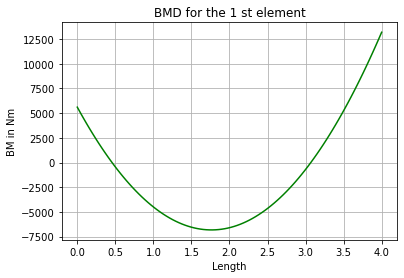

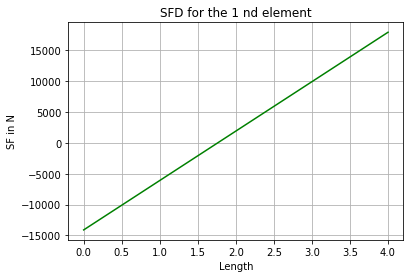

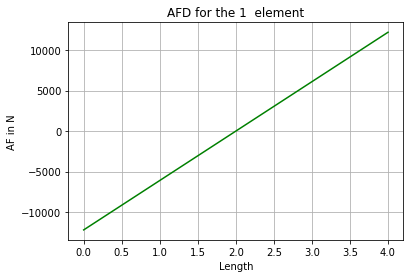

Member Force
 [-18505.40204984  -2333.24394757  -2803.81345282  18505.40204984
   2333.24394757  -5608.81723831]
Member Displacement
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  8.34027200e-06
 -1.28952707e-05 -2.52839624e-02]


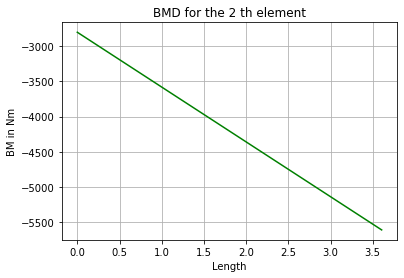

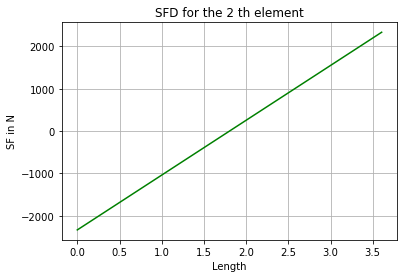

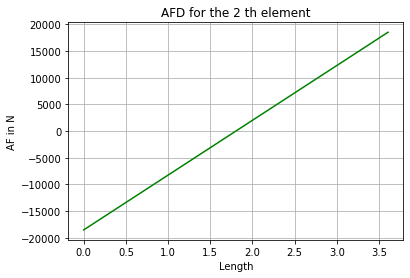

In [2]:
import numpy as np
from scipy.linalg import block_diag
import matplotlib.pyplot as plt
E=200e9
I=1e-6
A=0.04
L1=2
L2=4
L3=3
w=8000
M=w*L2*L2/12
P=w*L2/2
KTS=np.zeros((9,9))
association=np.array([(1,2,3,4,5,6),(7,8,9,1,2,3)])
ff=np.array([(0,P,M,0,P,-M),(0,0,0,0,0,0)])
ff=np.transpose(ff)
P_mat=np.zeros(3)
P_mat[0]=0
P_mat[1]=-P
P_mat[2]=-M
P_mat=np.transpose(P_mat)
Fdash=np.array([0,-P,M,0,0,0])
Fdash=np.transpose(Fdash)
Ux=np.zeros(6)
Ux=np.transpose(Ux)
u=np.zeros(6)
Ke=np.zeros(((6,6,2)))
for i in range(2):
    if i==0:
        l=L2
        T=np.identity(6)
        Tt=np.transpose(T)
    else:
        l=(L1**2+L3**2)**0.5
        c=L1/l
        s=-L3/l
        t=s/c
        R=np.array([(c,s,0),(-s,c,0),(0,0,1)])
        T=block_diag(R,R)
        Tt=np.transpose(T)
    a=12*E*I/(l**3)
    b=6*E*I/(l**2)
    c=4*E*I/l
    d=2*E*I/l
    e=A*E/l
    Ke[:,:,i]=np.array([(e,0,0,-e,0,0),(0,a,b,0,-a,b),(0,b , c ,0, -b ,d),(-e,0,0,e,0,0),(0,-a, -b,0, a, -b),(0,b, d,0, -b, c)])
    Kg=Tt@Ke[:,:,i]@T
    for j in range(6):
        for k in range(6):
            KTS[association[i,j]-1,association[i,k]-1]= KTS[association[i,j]-1,association[i,k]-1]+Kg[j,k]
Kpp=KTS[0:3,0:3]
Kpx=KTS[0:3,3:9]
Kxp=KTS[3:9,0:3]
Kxx=KTS[3:9,3:9]
print('Global Stiffnes Matrix \n',KTS)
Kpp_inverse=np.linalg.inv(Kpp)
print(Kpp_inverse.shape)
print(Kpp_inverse.shape)
Up=Kpp_inverse@P_mat
X=Kxp@Up-Fdash
print('Fdash',Fdash.shape)
Displacement=np.concatenate((Up, Ux), axis=0)
Force=np.concatenate((P_mat, X), axis=0)
print('Force Matrix \n',Force)
print('Displacement Matrix \n',Displacement)
for i in range (2):
    for j in range(6):
        u[j]=Displacement[association[i,j]-1]
    if i==0:
        l=L2
        f=Ke[:,:,i]@u+ff[:,i]
        print('Member Force\n',f)
        print('Member Displacement\n',u)
        x = np.linspace(0, l,100)
        y = f[2]-f[1]*x+w*x*x/2
        plt.plot(x,y, '-g', label=r'BMD')
        plt.ylabel('BM in Nm')
        plt.xlabel('Length')
        plt.title("BMD for the %i st element"%(i+1))
        plt.grid(True)
        plt.show()
        x = np.linspace(0, l,100)
        y = -f[1]+w*x
        plt.plot(x,y, '-g', label=r'SFD')
        plt.ylabel('SF in N')
        plt.xlabel('Length')
        plt.title("SFD for the %i nd element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[0],f[3]]
        plt.plot(x,y, '-g', label=r'SFD')
        plt.ylabel('AF in N')
        plt.xlabel('Length')
        plt.title("AFD for the %i  element"%(i+1))
        plt.grid(True)
        plt.show()
    else:
        l=(L1**2+L3**2)**0.5
        c=L1/l
        s=-L3/l
        t=s/c
        R=np.array([(c,s,0),(-s,c,0),(0,0,1)])
        T=block_diag(R,R)
        u=T@u
        f=Ke[:,:,i]@u+ff[:,i]
        print('Member Force\n',f)
        print('Member Displacement\n',u)
        x= [0,l]
        y= [f[2], f[5]]
        plt.plot(x,y, '-g', label=r'BMD')
        plt.ylabel('BM in Nm')
        plt.xlabel('Length')
        plt.title("BMD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[1],f[4]]
        plt.plot(x,y, '-g', label=r'SFD')
        plt.ylabel('SF in N')
        plt.xlabel('Length')
        plt.title("SFD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()
        x = [0,l]
        y =  [f[0],f[3]]
        plt.plot(x,y, '-g', label=r'SFD')
        plt.ylabel('AF in N')
        plt.xlabel('Length')
        plt.title("AFD for the %i th element"%(i+1))
        plt.grid(True)
        plt.show()